In [293]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


## 1. understanding of the datab

In [294]:
spotify = pd.read_csv("rolling_stones_spotify.csv",index_col=0)
spotify.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [295]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


In [296]:
## looking for the missing values in the dataset

In [297]:
# no null valuesb
spotify.isna().sum(axis=0)

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [298]:
# duplicates
spotify.duplicated(['id']).sum()

0

In [299]:
spotify.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


## Data Preprocessing
### first date time , categorical and then numerical

In [300]:
spotify.release_date = pd.to_datetime(spotify.release_date)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   id                1610 non-null   object        
 5   uri               1610 non-null   object        
 6   acousticness      1610 non-null   float64       
 7   danceability      1610 non-null   float64       
 8   energy            1610 non-null   float64       
 9   instrumentalness  1610 non-null   float64       
 10  liveness          1610 non-null   float64       
 11  loudness          1610 non-null   float64       
 12  speechiness       1610 non-null   float64       
 13  tempo             1610 non-null   float64       
 14  valence           1610 n

In [301]:
#Check for count of unique values in object columns
obj = spotify.select_dtypes(include ='object').columns
obj

Index(['name', 'album', 'id', 'uri'], dtype='object')

In [302]:
for var in obj:
    print('{} : {}'.format(var,spotify[var].nunique()))

name : 954
album : 90
id : 1610
uri : 1610


In [303]:
spotify.name.unique()

array(['Concert Intro Music - Live', 'Street Fighting Man - Live',
       'Start Me Up - Live', "If You Can't Rock Me - Live",
       'Don’t Stop - Live', 'Monkey Man - Live', 'Angie - Live',
       'Let It Bleed - Live', 'Midnight Rambler - Live',
       'Tumbling Dice - Live', 'Band Introductions - Live',
       'Thru And Thru - Live', 'Happy - Live', 'Gimme Shelter - Live',
       'You Got Me Rocking - Live', "Can't You Hear Me Knocking - Live",
       'Honky Tonk Women - Live', 'Satisfaction - Live',
       "It's Only Rock 'N' Roll - Live",
       'When The Whip Comes Down - Live', 'Brown Sugar - Live',
       'Sympathy For The Devil - Live', 'Jumpin Jack Flash - Live',
       'Honky Tonk Women - Live At The El Mocambo 1977',
       'All Down The Line - Live At The El Mocambo 1977',
       'Hand Of Fate - Live At The El Mocambo 1977',
       'Route 66 - Live At The El Mocambo 1977',
       'Fool To Cry - Live At The El Mocambo 1977',
       'Crazy Mama - Live At The El Mocambo 1977

In [304]:
spotify.album.unique()

array(['Licked Live In NYC', 'Live At The El Mocambo',
       'Tattoo You (Super Deluxe)', 'Tattoo You', 'A Bigger Bang (Live)',
       'Steel Wheels Live', 'Goats Head Soup (Deluxe)',
       'Bridges To Buenos Aires (Live)', 'Bridges To Bremen (Live)',
       'Honk (Deluxe)', 'Voodoo Lounge Uncut (Live)',
       'From The Vault: No Security - San Jose 1999 (Live)', 'On Air',
       'On Air (Deluxe)', 'Sticky Fingers Live At The Fonda Theatre',
       'Ladies & Gentlemen (Live)', 'Blue & Lonesome',
       'Havana Moon (Live)', 'Totally Stripped - Brixton (Live)',
       'Totally Stripped - Amsterdam (Live)', 'Totally Stripped (Live)',
       'Totally Stripped - Paris (Live)',
       'Live 1965: Music From Charlie Is My Darling (Live From England/1965)',
       'Live At The Checkerboard Lounge', "Some Girls: Live In Texas '78",
       'A Bigger Bang (2009 Re-Mastered)', 'Live Licks',
       'Bridges To Babylon', 'Bridges To Babylon (Remastered)',
       'Stripped', 'Voodoo Lounge (Remas

In [305]:
spotify.track_number.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype=int64)

In [306]:
spotify.track_number = spotify.track_number.astype('category')

In [307]:
## since url and id are having only unique values and do not add anything to our purpose.we can drop these two columns.b

In [308]:
new_spotify = spotify.drop(columns=["id","uri"])
new_spotify

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


### processing numerical columns: Checking for outliers in numerical variables using descriptive stats looking at the difference between the mean and min & max values of variables


In [309]:
spotify.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [310]:
num_col = new_spotify.select_dtypes(include=["float","int"]).columns
len(num_col)

11

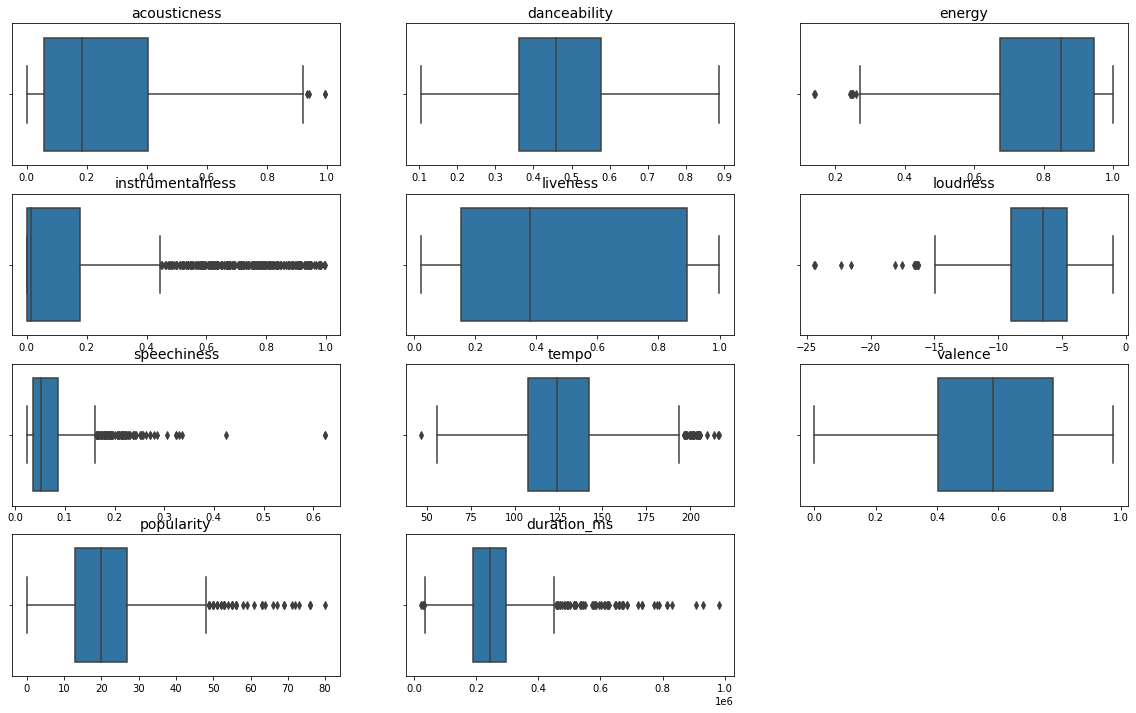

In [311]:
num_col = new_spotify.select_dtypes(include = ['float', 'int']).columns
f, ax = plt.subplots(4, 3, figsize = (20,12))
k = 0
for i in range(4):
  for j in range(3):
    # to print nothinng in the last plots as the no. of plots are 11 and cannot be adjusted in a grid
    if len(num_col) == k:
      ax[i,j].axis("off")
      break
    sns.boxplot(x = num_col[k], data = new_spotify, ax = ax[i,j])
    ax[i,j].set_title(num_col[k], size = 14)
    ax[i,j].set_xlabel('')
    k += 1
    
      

In [312]:
def outlier_check(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr = q3-q1
    low_r = q1-(1.5*iqr)
    up_r = q3
    return low_r,up_r

In [313]:
for rav in num_col:
  low_r,up_r = outlier_check(new_spotify[rav])
  count = new_spotify.loc[(new_spotify[rav] < low_r) | (new_spotify[rav] > up_r)].shape[0]
  print('{} : \nCount = {}\tlow_r : {:.4f}   up_r : {:.4f}'.format(rav, count, low_r, up_r))
  new_spotify.loc[(new_spotify[rav] < low_r) , rav] = low_r
  new_spotify.loc[(new_spotify[rav] > up_r) , rav] = up_r

acousticness : 
Count = 403	low_r : -0.4597   up_r : 0.4038
danceability : 
Count = 401	low_r : 0.0386   up_r : 0.5780
energy : 
Count = 408	low_r : 0.2675   up_r : 0.9450
instrumentalness : 
Count = 402	low_r : -0.2680   up_r : 0.1790
liveness : 
Count = 403	low_r : -0.9581   up_r : 0.8938
loudness : 
Count = 417	low_r : -15.5431   up_r : -4.6087
speechiness : 
Count = 402	low_r : -0.0386   up_r : 0.0866
tempo : 
Count = 404	low_r : 54.9432   up_r : 142.3558
valence : 
Count = 402	low_r : -0.1564   up_r : 0.7780
popularity : 
Count = 379	low_r : -8.0000   up_r : 27.0000
duration_ms : 
Count = 410	low_r : 33552.8750   up_r : 295319.7500


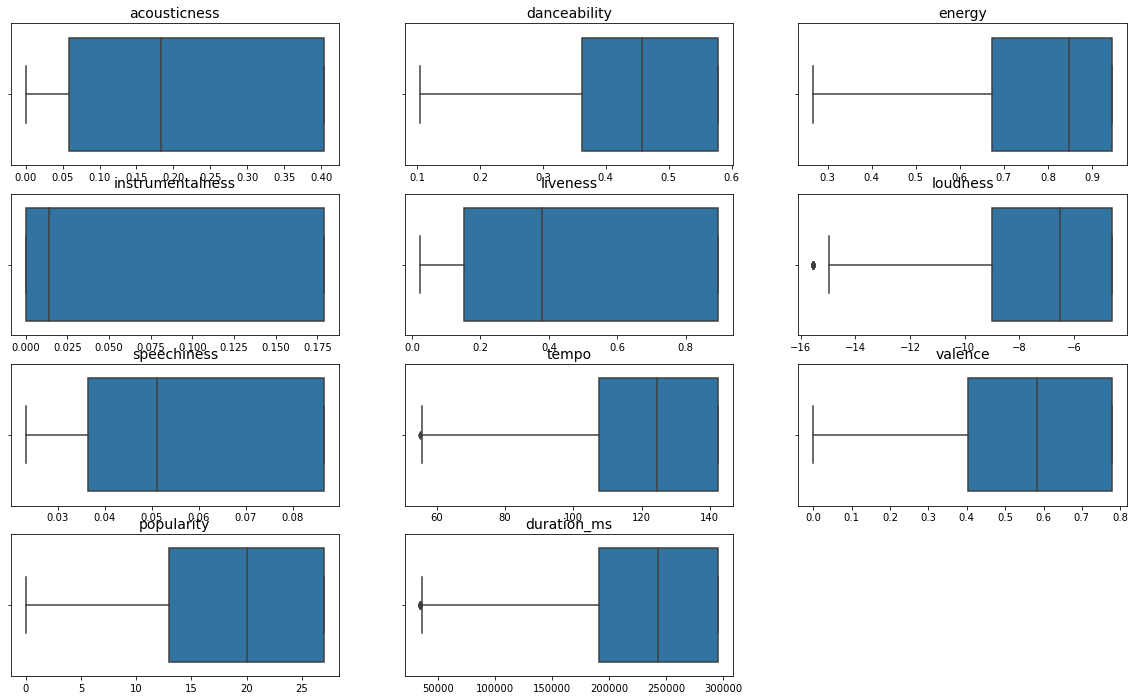

In [314]:
f, ax = plt.subplots(4, 3, figsize = (20,12))
k = 0
for i in range(4):
  for j in range(3):
    if len(num_col) == k:
      ax[i,j].axis('off')
      break
    sns.boxplot(x = num_col[k], data = new_spotify, ax = ax[i,j])
    ax[i,j].set_title(num_col[k], size = 14)
    ax[i,j].set_xlabel('')
    k += 1

In [315]:
new_spotify['year'] = new_spotify.release_date.dt.year
new_spotify['mon'] = new_spotify.release_date.dt.month

In [316]:
new_spotify.drop(columns= [ 'release_date'], inplace = True)

In [317]:
new_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              1610 non-null   object  
 1   album             1610 non-null   object  
 2   track_number      1610 non-null   category
 3   acousticness      1610 non-null   float64 
 4   danceability      1610 non-null   float64 
 5   energy            1610 non-null   float64 
 6   instrumentalness  1610 non-null   float64 
 7   liveness          1610 non-null   float64 
 8   loudness          1610 non-null   float64 
 9   speechiness       1610 non-null   float64 
 10  tempo             1610 non-null   float64 
 11  valence           1610 non-null   float64 
 12  popularity        1610 non-null   int64   
 13  duration_ms       1610 non-null   float64 
 14  year              1610 non-null   int64   
 15  mon               1610 non-null   int64   
dtypes: category(1), float64(

In [318]:
##Which 2 albums would you recommend to anyone based on the number of popular songs in an album? Use necessary visualizations to support your answer.

In [319]:
new_spotify.sort_values('popularity', ascending = False)[['name', 'album', 'popularity']][:30]

,name,album,popularity
0,Concert Intro Music - Live,Licked Live In NYC,27
872,Waiting On A Friend - Remastered 2009,Tattoo You (2009 Re-Mastered),27
874,Summer Romance - Remastered,Emotional Rescue (2009 Re-Mastered),27
875,Send It To Me - Remastered,Emotional Rescue (2009 Re-Mastered),27
876,Let Me Go - Remastered,Emotional Rescue (2009 Re-Mastered),27
877,Indian Girl - Remastered,Emotional Rescue (2009 Re-Mastered),27
878,Where The Boys Go - Remastered,Emotional Rescue (2009 Re-Mastered),27
879,Down In The Hole - Remastered,Emotional Rescue (2009 Re-Mastered),27
880,Emotional Rescue - Remastered 2009,Emotional Rescue (2009 Re-Mastered),27
881,She's So Cold - Remastered,Emotional Rescue (2009 Re-Mastered),27


In [320]:
## popularity of album

In [321]:
new_spotify.groupby(['album'])['popularity'].mean().sort_values(ascending = False)[:10]

album
Goats Head Soup (Remastered 2009)                            27.0
Let It Bleed (50th Anniversary Edition / Remastered 2019)    27.0
Aftermath                                                    27.0
Exile On Main Street (2010 Re-Mastered)                      27.0
Emotional Rescue (2009 Re-Mastered)                          27.0
Beggars Banquet (50th Anniversary Edition)                   27.0
Out Of Our Heads                                             27.0
Some Girls                                                   27.0
Sticky Fingers (Remastered)                                  27.0
Tattoo You (2009 Re-Mastered)                                27.0
Name: popularity, dtype: float64

### What has changed over the years? Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern. Use necessary visualizations to support your points.

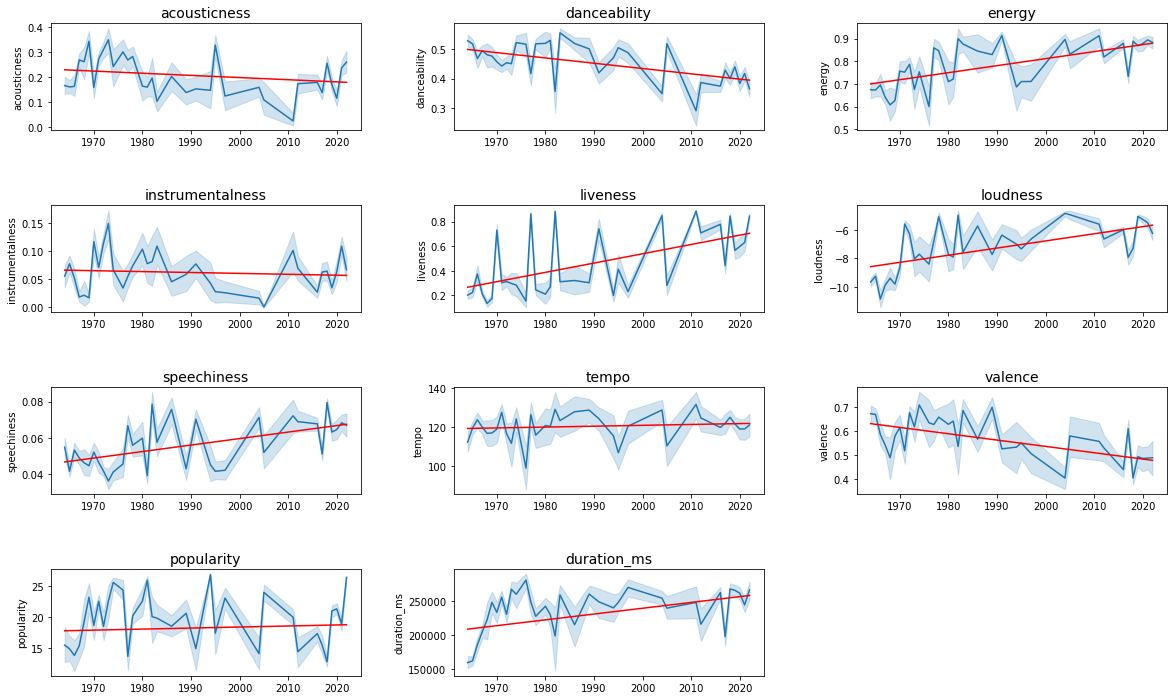

In [322]:
f, ax = plt.subplots(4, 3, figsize = (20,12))
k = 0
for i in range(4):
  for j in range(3):
    if len(num_col) == k:
      ax[i,j].axis('off')
      break
    sns.lineplot(x = 'year', y = num_col[k], data = new_spotify, ax = ax[i,j])
    z = np.polyfit(new_spotify['year'], new_spotify[num_col[k]], 1)
    p = np.poly1d(z)
    ax[i, j].plot(new_spotify['year'],p(new_spotify['year']),"r")
    ax[i,j].set_title(num_col[k], size = 14)
    ax[i,j].set_xlabel('')
    k += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.7)

In [323]:
## increasing trend: liveliness loudness speechiness and duration.
## decreasing trend: valence and danceability
## no othrr 

## relation of popularity to different factors.


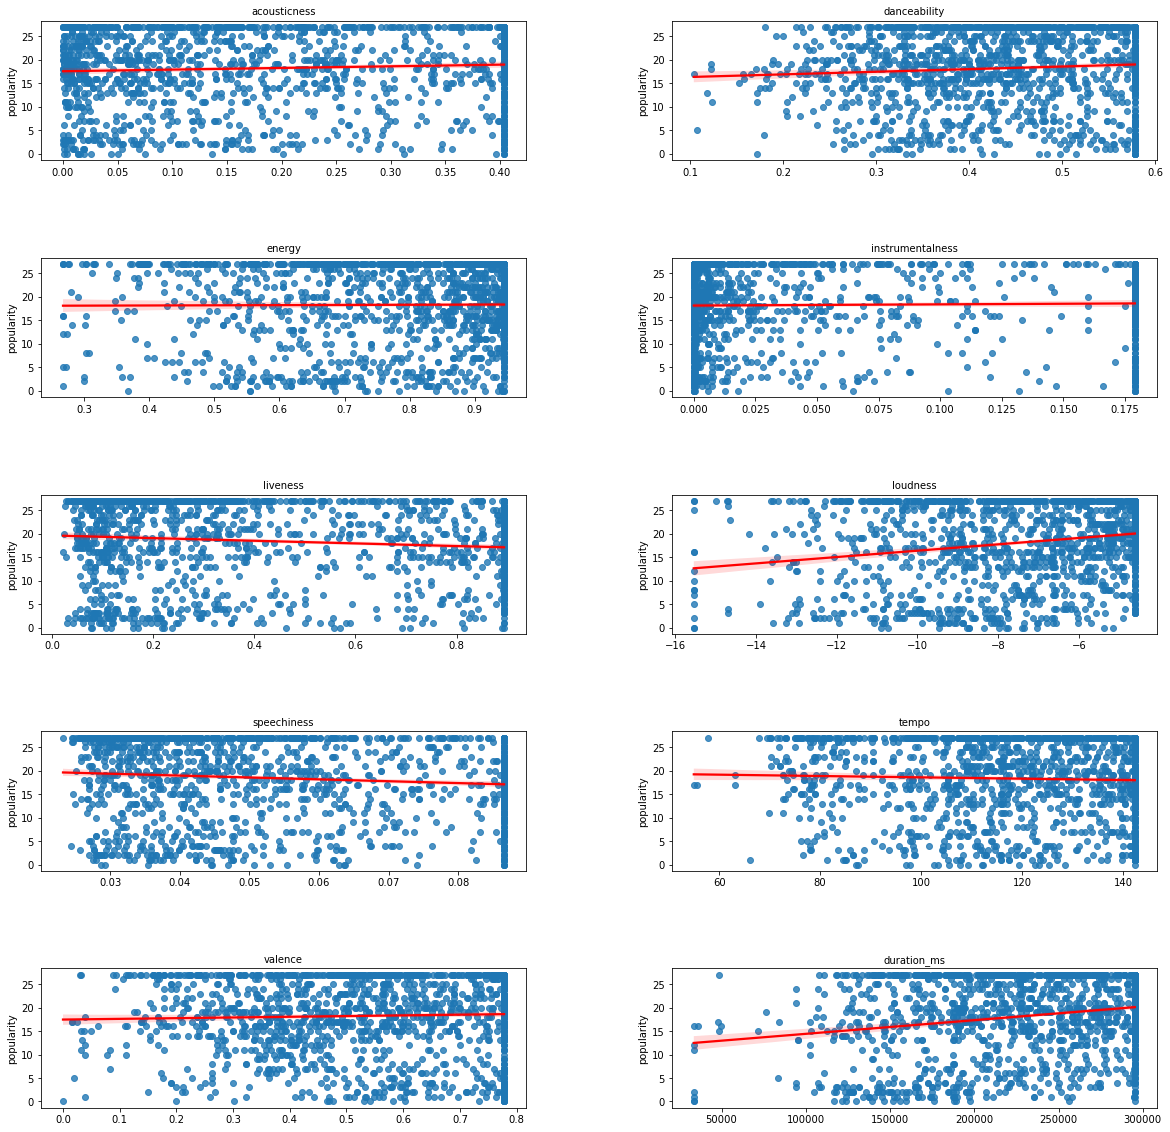

In [324]:
y = 'popularity'
vars = num_col.drop('popularity')
k = 0
f,ax = plt.subplots(5,2, figsize = (20,20))
for i in range(5):
  for j in range(2):
    sns.regplot(x = vars[k], y = y, data = new_spotify,ax = ax[i,j], line_kws ={'color':'red'} )
    #sns.lineplot(x = vars[k], y = y, data = new_data,ax = ax[i,j] )
    ax[i,j].set_title(vars[k], size = 10)
    ax[i,j].set_xlabel('')
    k += 1
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)

In [325]:
## no clear relationship is seen all are same

In [326]:
new_spotify.year.describe()

count    1610.000000
mean     1991.745963
std        22.440296
min      1964.000000
25%      1970.000000
50%      1986.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [327]:
##create groups of data wrt to year with 5 years

In [328]:
new_spotify['year_class'] = pd.cut(new_spotify.year, 6, labels = [1,2,3,4,5,6])

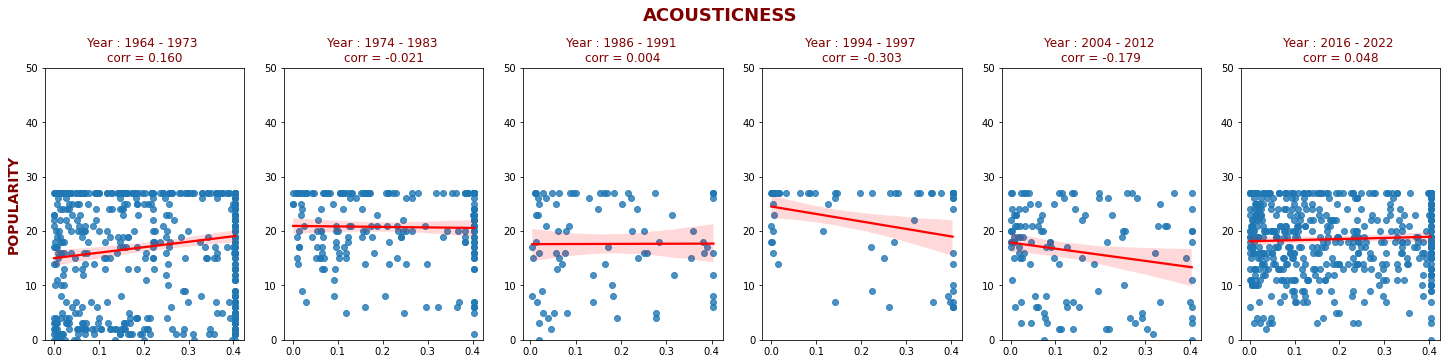

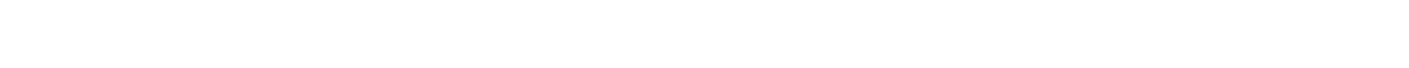

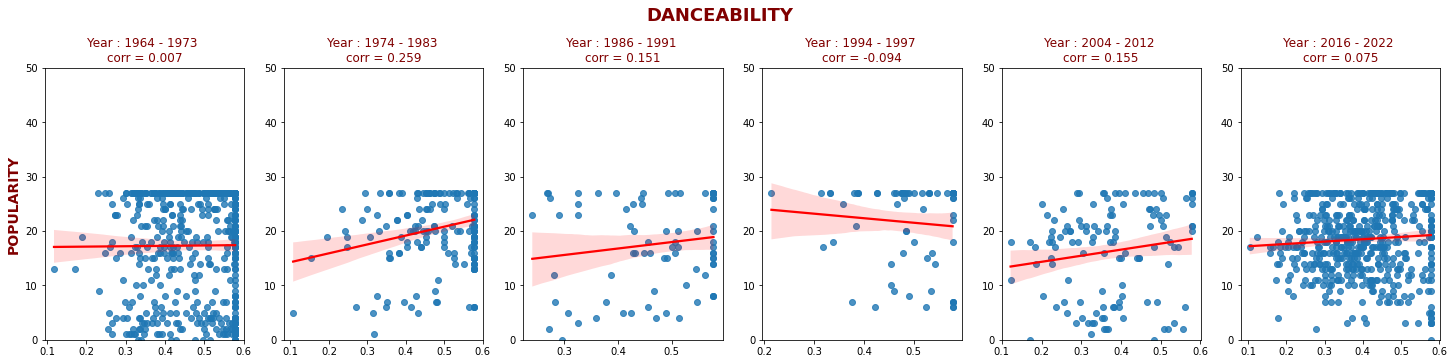

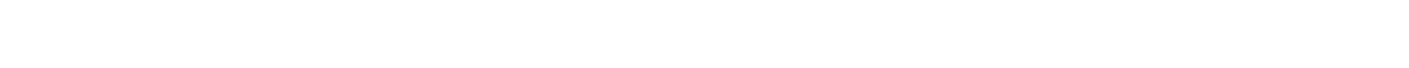

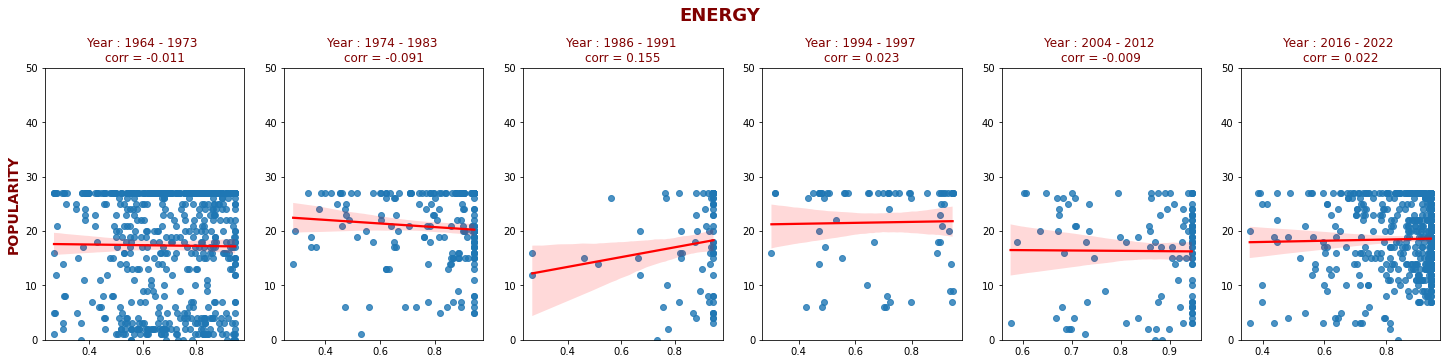

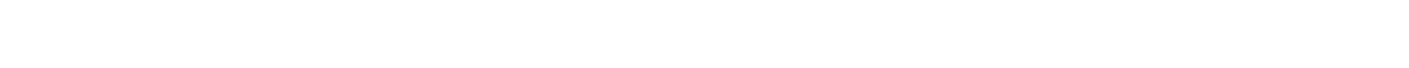

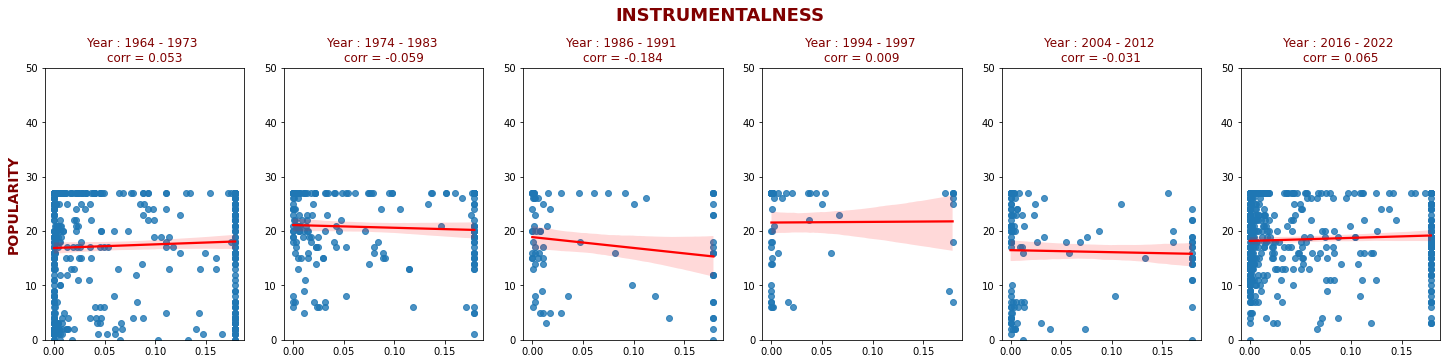

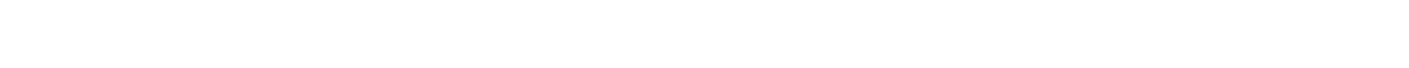

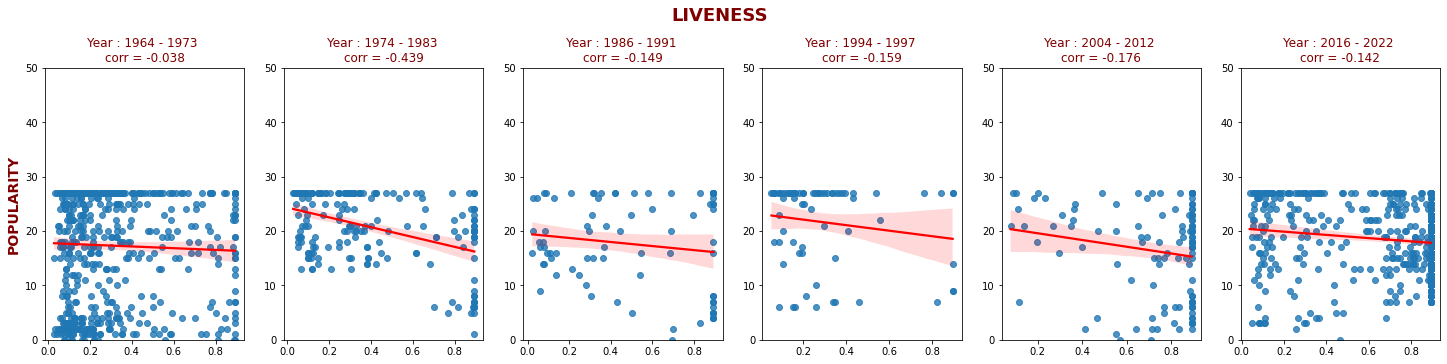

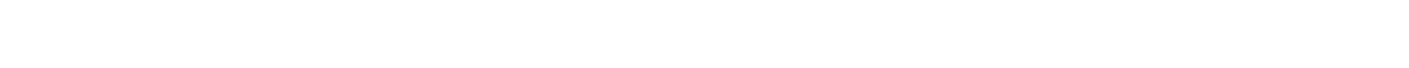

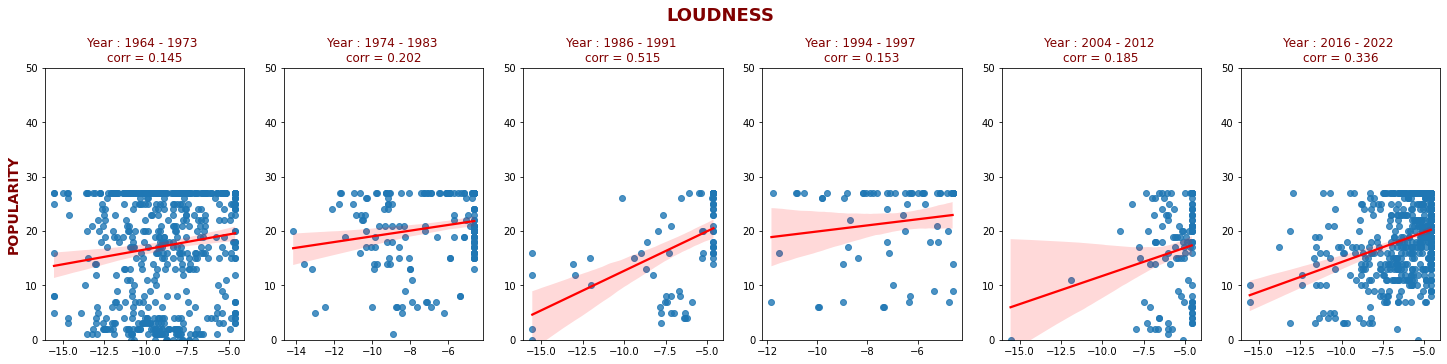

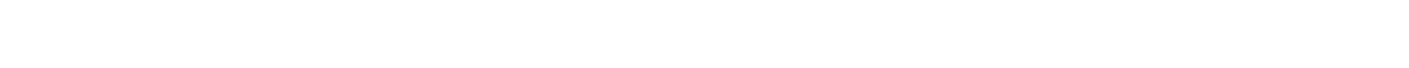

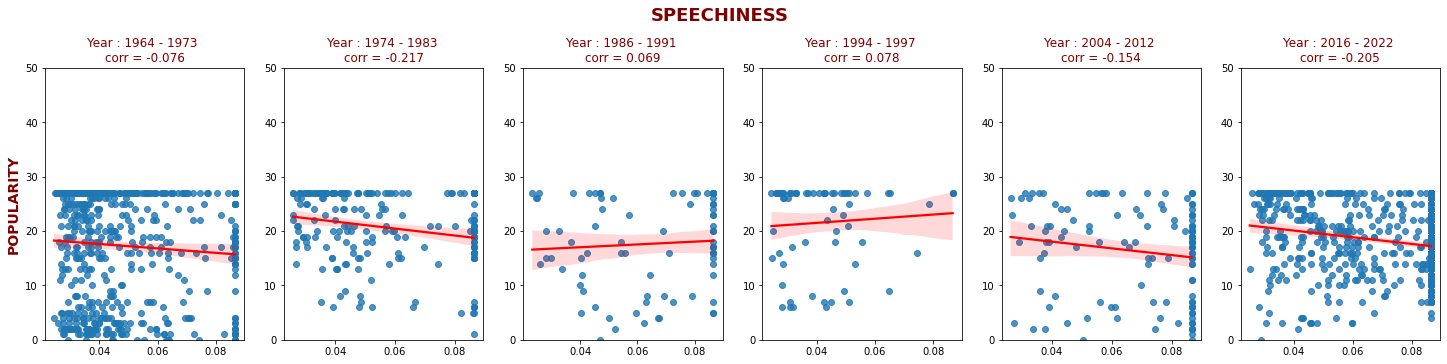

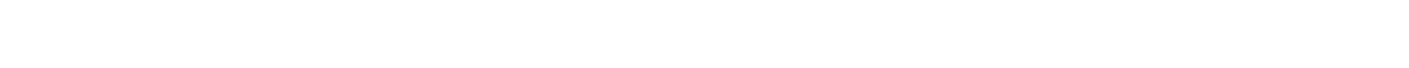

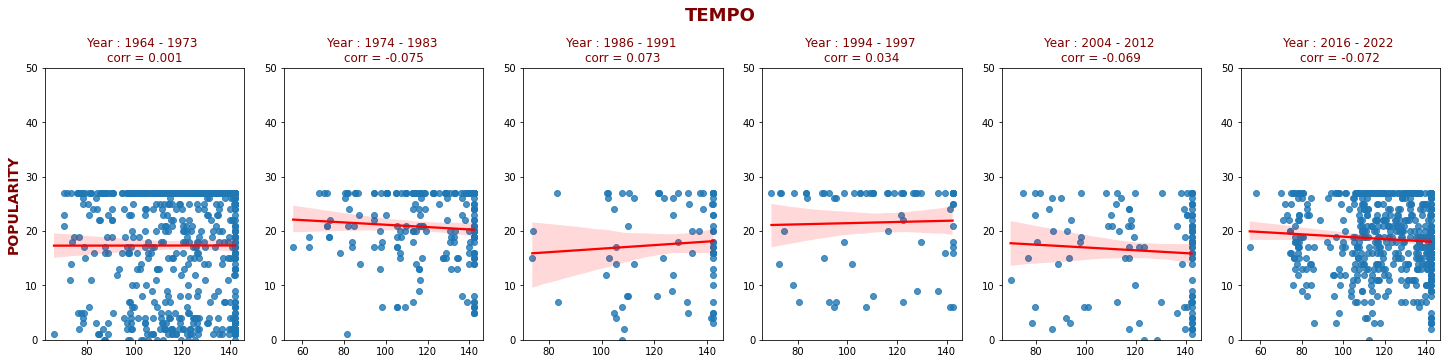

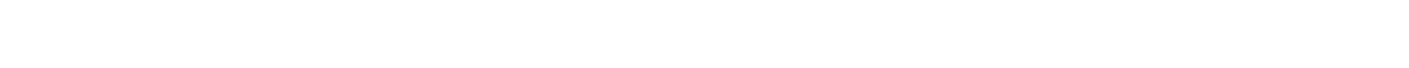

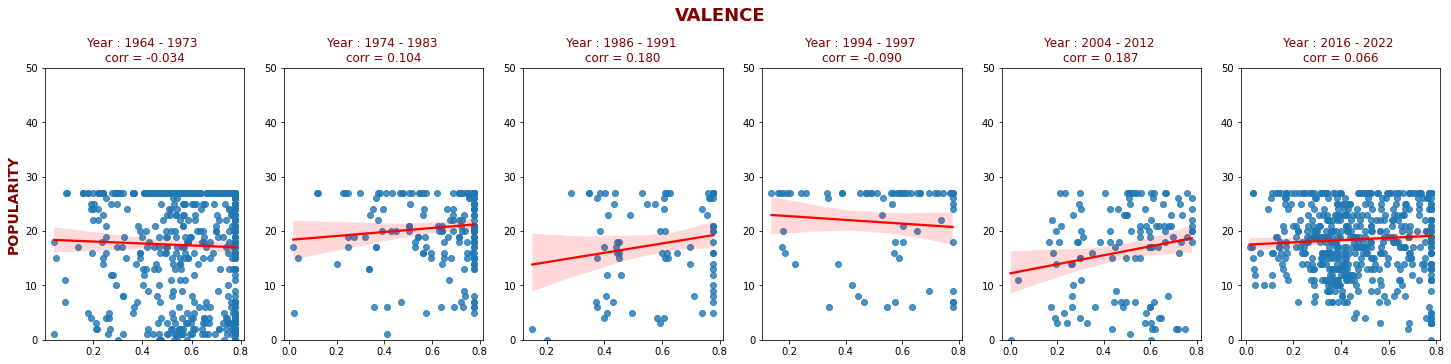

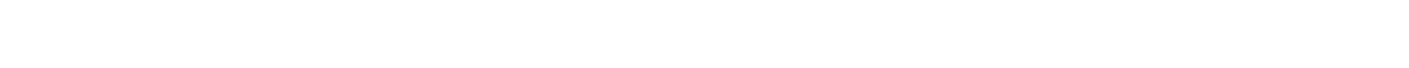

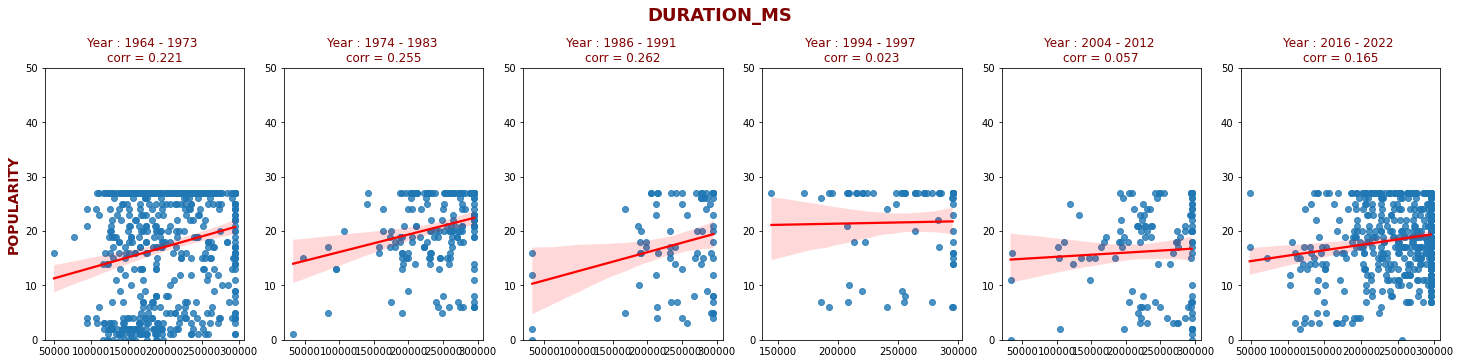

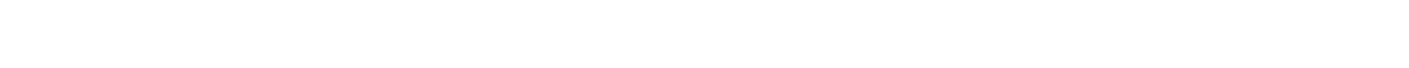

In [329]:
y = 'popularity'
corr_d = {}
vars = num_col.drop('popularity')
for v in vars:
  i = 0 
  temp_d = []
  f, ax = plt.subplots(1,6, figsize = (25,5))
  for a in range(1,7):
    subdata = new_spotify.loc[new_spotify.year_class == a,]
    sns.regplot(x = v , y = y, data = subdata, line_kws ={'color':'red'}, ax = ax[i])
    ax[i].set_ylim(0,50)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.upper(),size = 14,weight = 'bold', color = 'maroon')
    min_year = subdata.year.min()
    max_year = subdata.year.max()
    corr = subdata[v].corr(subdata[y])
    temp_d.append(corr)
    string = 'Year : {} - {} \ncorr = {:.3f}'.format(min_year, max_year, corr)
    ax[i].set_title(string, size = 12, color = 'maroon')
    if  i >= 1:
      ax[i].set_ylabel('')
    i += 1
  plt.suptitle(v.upper(), size = 18, weight = 'bold', color = 'maroon', y = 1.05)
  plt.figure(figsize = (25,1))
  plt.axis('off')
  corr_d.update({v : temp_d})

In [330]:
## Check for Correlation values across year groups and the trend in them.

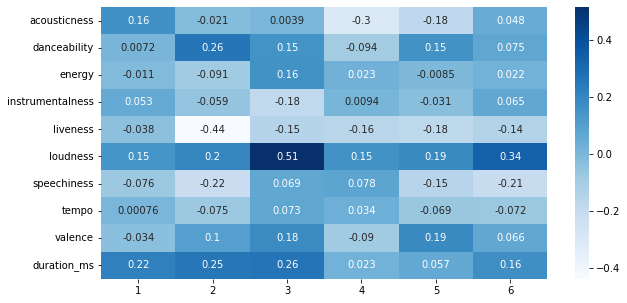

In [331]:
relationship = pd.DataFrame(corr_d, index = range(1,7)).T
plt.figure(figsize = (10,5))
sns.heatmap(relationship, annot = True, cmap = 'Blues')
plt.show()

In [332]:
##Since there are 12 numerical variables we shall go for dimensionality reduction technique.

###PCA : Principal Component Analysis 

In [333]:
new_spotify.loc[:,'acousticness':'duration_ms'].describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,0.205454,0.448971,0.786232,0.061640,0.476083,-7.188254,0.056669,120.582539,0.558406,18.280124,232907.353028
std,0.153156,0.113379,0.172973,0.075551,0.328473,2.603047,0.022032,21.033801,0.201214,8.233187,58335.095963
min,0.000009,0.104000,0.267500,0.000000,0.021900,-15.543125,0.023200,54.943250,0.000000,0.000000,33552.875000
25%,0.058350,0.362250,0.674000,0.000219,0.153000,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,0.183000,0.458000,0.848500,0.013750,0.379500,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,0.403563,0.578000,0.945000,0.179000,0.893563,-4.609312,0.086600,142.354062,0.778000,27.000000,295279.812500
max,0.403750,0.578000,0.945000,0.179000,0.893750,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000


In [334]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [335]:
spotify_std = sc.fit_transform(new_spotify.loc[:,'acousticness':'duration_ms'])

In [336]:
correlation_mat = np.corrcoef(spotify_std, rowvar = False)

In [337]:
eigen_val, eigen_vec = np.linalg.eig(correlation_mat)

In [338]:
var_cap = sorted((eigen_val / eigen_val.sum()) *100, reverse = True)

<BarContainer object of 11 artists>

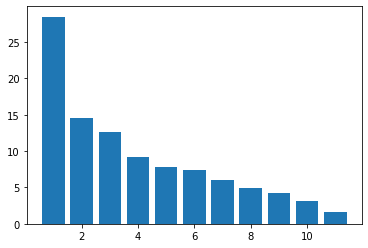

In [339]:
plt.bar(x = range(1,12), height = var_cap)

In [340]:
np.cumsum(var_cap)

array([ 28.49769899,  43.03544487,  55.67980291,  64.89513256,
        72.7656056 ,  80.17069015,  86.14908112,  91.06936606,
        95.31694995,  98.40692589, 100.        ])

In [341]:
eigen_val

array([3.13474689, 1.59915205, 1.39087938, 0.17523815, 1.01368626,
       0.8145593 , 0.86575203, 0.33989735, 0.65762301, 0.54123134,
       0.46723423])

In [342]:
pca = PCA(n_components = 6)

In [343]:
pca.fit(spotify_std)

PCA(n_components=6)

In [344]:
spoti_data = pca.transform(spotify_std)

In [345]:
pca_df = pd.DataFrame(spoti_data, columns = ['PC{}'.format(i+1) for i in range(6)])

In [346]:
exclude_var = new_spotify.loc[:,'acousticness':'duration_ms'].columns
obj_cat_data = new_spotify.loc[:,~new_spotify.columns.isin(exclude_var)]

In [347]:
final_data = pd.concat([pca_df,obj_cat_data] , axis = 1)
final_data.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,name,album,track_number,year,mon,year_class
0,-0.558430,0.802217,2.563430,1.967617,0.588901,-1.987866,Concert Intro Music - Live,Licked Live In NYC,1,2022,6,6
1,-2.351622,0.558709,-0.735155,2.243239,0.559887,0.315486,Street Fighting Man - Live,Licked Live In NYC,2,2022,6,6


In [348]:
final_data.drop(columns = ['name'], inplace = True)

In [349]:
fd = pd.get_dummies(final_data)

## Perform cluster analysis to create cohorts of songs:
Identify the right number of clusters
Use appropriate clustering algorithm
Define each cluster based on the features 

In [350]:
from sklearn.cluster import KMeans

In [351]:
errors = []
for i in range(1,30):
  kmm = KMeans(n_clusters = i)
  kmm.fit(fd)
  errors.append(kmm.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


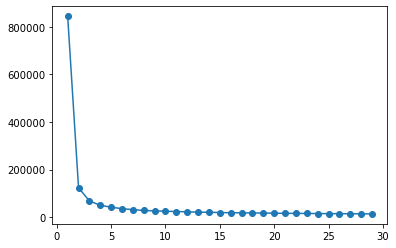

In [352]:
plt.plot(range(1,30), errors)
plt.scatter(range(1,30), errors)

In [353]:
kmm = KMeans(n_clusters = 3)
kmm.fit(fd)

KMeans(n_clusters=3)

In [354]:
fd['clus_label'] = kmm.labels_

In [355]:
fd.groupby('clus_label').mean()

,PC1,PC2,PC3,PC4,PC5,PC6,year,mon,album_12 X 5,album_12 x 5,...,track_number_44,track_number_45,track_number_46,track_number_47,year_class_1,year_class_2,year_class_3,year_class_4,year_class_5,year_class_6
clus_label,,,,,,,,,,,,,,,,,,,,,
0,-1.140762,0.168345,-0.040198,-0.043027,-0.133503,-0.089354,2016.658209,8.511940,0.000000,0.000000,...,0.001493,0.001493,0.001493,0.001493,0.000000,0.000000,0.000000,0.000000,0.185075,0.814925
1,1.009699,-0.044045,0.141328,0.079843,0.095691,0.109043,1969.470014,6.666667,0.016736,0.016736,...,0.000000,0.000000,0.000000,0.000000,0.824268,0.175732,0.000000,0.000000,0.000000,0.000000
2,0.180970,-0.364174,-0.333632,-0.127442,0.093436,-0.082137,1988.520179,6.049327,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.331839,0.358744,0.309417,0.000000,0.000000


In [292]:
data_new = new_spotify.drop(columns = 'name')
data_dummy = pd.get_dummies(data_new)
data_dummy.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,...,track_number_44,track_number_45,track_number_46,track_number_47,year_class_1,year_class_2,year_class_3,year_class_4,year_class_5,year_class_6
0,0.08240,0.463,0.945,0.179000,0.89375,-12.913,0.0866,118.001,0.0302,27,...,0,0,0,0,0,0,0,0,0,1
1,0.40375,0.326,0.945,0.179000,0.89375,-4.803,0.0759,131.455,0.3180,27,...,0,0,0,0,0,0,0,0,0,1
2,0.40375,0.386,0.945,0.179000,0.89375,-4.936,0.0866,130.066,0.3130,27,...,0,0,0,0,0,0,0,0,0,1
3,0.40375,0.369,0.945,0.000107,0.89375,-5.535,0.0866,132.994,0.1470,27,...,0,0,0,0,0,0,0,0,0,1
4,0.40000,0.303,0.945,0.055900,0.89375,-5.098,0.0866,130.533,0.2060,27,...,0,0,0,0,0,0,0,0,0,1


In [356]:
data_dummy_copy = data_dummy.copy()
data_dummy_copy['cluster'] = kmm.labels_
clus_prof_1 = data_dummy_copy.groupby('cluster').mean()
clus_prof_1.insert(loc = 0 , column = 'size', value = data_dummy_copy.groupby('cluster').size() )
clus_prof_1

,size,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,track_number_44,track_number_45,track_number_46,track_number_47,year_class_1,year_class_2,year_class_3,year_class_4,year_class_5,year_class_6
cluster,,,,,,,,,,,,,,,,,,,,,
0,670,0.180586,0.398552,0.859761,0.055866,0.676851,-6.065719,0.066193,121.906489,0.487624,...,0.001493,0.001493,0.001493,0.001493,0.000000,0.000000,0.000000,0.000000,0.185075,0.814925
1,717,0.238388,0.483710,0.715679,0.066607,0.315139,-8.310331,0.048411,119.084800,0.615993,...,0.000000,0.000000,0.000000,0.000000,0.824268,0.175732,0.000000,0.000000,0.000000,0.000000
2,223,0.174279,0.488762,0.792157,0.063019,0.390351,-6.953139,0.054605,121.420357,0.585910,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.331839,0.358744,0.309417,0.000000,0.000000


In [357]:
kmm = KMeans(n_clusters = 3)
kmm.fit(data_dummy)

KMeans(n_clusters=3)

In [358]:
data_dummy_copy_2 = data_dummy.copy()
data_dummy_copy_2['cluster'] = kmm.labels_
clus_prof_2 = data_dummy_copy_2.groupby('cluster').mean()
clus_prof_2.insert(loc = 0 , column = 'size', value = data_dummy_copy_2.groupby('cluster').size() )
clus_prof_2

,size,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,track_number_44,track_number_45,track_number_46,track_number_47,year_class_1,year_class_2,year_class_3,year_class_4,year_class_5,year_class_6
cluster,,,,,,,,,,,,,,,,,,,,,
0,768,0.223883,0.430557,0.808561,0.053738,0.562586,-6.511706,0.059254,119.608314,0.511418,...,0.001302,0.001302,0.001302,0.001302,0.213542,0.141927,0.059896,0.055990,0.076823,0.451823
1,322,0.190619,0.481311,0.707663,0.073532,0.323310,-9.004587,0.051476,115.582367,0.613992,...,0.000000,0.000000,0.000000,0.000000,0.689441,0.052795,0.018634,0.006211,0.052795,0.180124
2,520,0.187421,0.456142,0.801906,0.065947,0.442926,-7.062734,0.056066,125.117656,0.593382,...,0.000000,0.000000,0.000000,0.000000,0.394231,0.142308,0.053846,0.046154,0.092308,0.271154


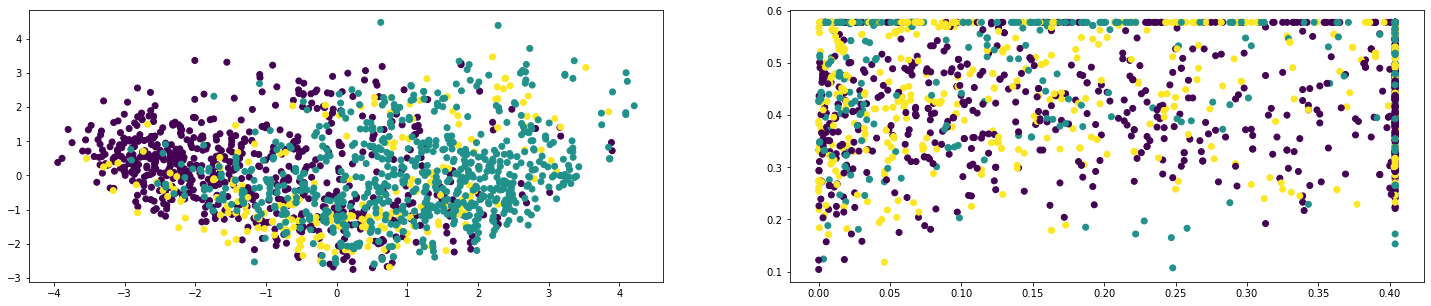

In [359]:
f,ax = plt.subplots(1,2, figsize = (25,5))
# PCA data
ax[0].scatter(x = fd.PC1, y= fd.PC2, c = fd.clus_label)
ax[1].scatter(x = data_dummy_copy_2.acousticness, y= data_dummy_copy_2.danceability, c = data_dummy_copy_2.cluster)
plt.show()